# Introduction to Machine Learning (session 1)

By the end of this session you will:
- have a clear understanding of Machine Learning, and distinguish it from statistics
- understand training, validation, test sets,
- be able to analyze a new dataset and visualize it [if possible],
- learn some basic machine learning algorithms (naive bayes, trees-based algorithms, linear classifiers, etc.)
- have a clear understanding of the variance-bias tradeoff
- understand over-fitting

## Machine Learning

![Machine Learning Applications](figures/Slide4.PNG)

![Kaggle](figures/Slide5.PNG)

## Data
The first concern of Machine Learning is **Data** <br>
**No Data, No Machine Learning** (this statement is true to a good extent; but there are ML methods which are not data-driven)

![features](figures/Slide11.PNG)

![features2](figures/Slide12.PNG)

![Training](figures/Slide13.PNG)

### Scikit-learn library for Python
We will introduce the scikit-learn library of python (http://scikit-learn.org), which is the most utilized machine learning library.

Sklearn is shipped with 7 small datasets to get researchers acquainted with Machine Learning:
- boston --> &nbsp; &nbsp; `load_boston` Load and return the boston house-prices dataset (regression).
- iris --> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; `load_iris([return_X_y])` Load and return the iris dataset (classification).
- diabetes -->  &nbsp; `load_diabetes([return_X_y]) Load and return the diabetes dataset (regression).
- digits -->  &nbsp; &nbsp; &nbsp; &nbsp; `load_digits([n_class, return_X_y])` Load and return the digits dataset (classification).
- linnerud --> &nbsp;   `load_linnerud([return_X_y])` Load and return the linnerud dataset (multivariate regression).
- wine --> &nbsp; &nbsp; &nbsp; &nbsp; `load_wine([return_X_y])` Load and return the wine dataset (classification).
- breast_cancer --> `load_breast_cancer([return_X_y])` Load and return the breast cancer wisconsin dataset (classification)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import numpy as np
from sklearn import datasets
import pandas as pd
from IPython.display import display

#### Wine dataset

In [2]:
wine = datasets.load_wine()

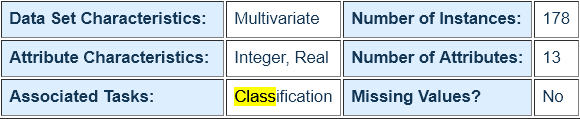

In [24]:
print(wine.data.shape)
print(wine.target_names)
print(wine.feature_names)

(178, 13)
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [30]:
wine_df = pd.DataFrame(np.concatenate([wine.data, np.expand_dims(wine.target, axis=1)], axis=1), 
             columns=wine.feature_names + ['target'])

display(wine_df.head())
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### PCA (Principal Component Analysis)
https://en.wikipedia.org/wiki/Principal_component_analysis
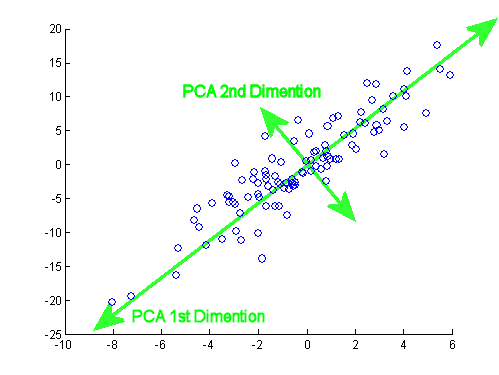

<IPython.core.display.Javascript object>


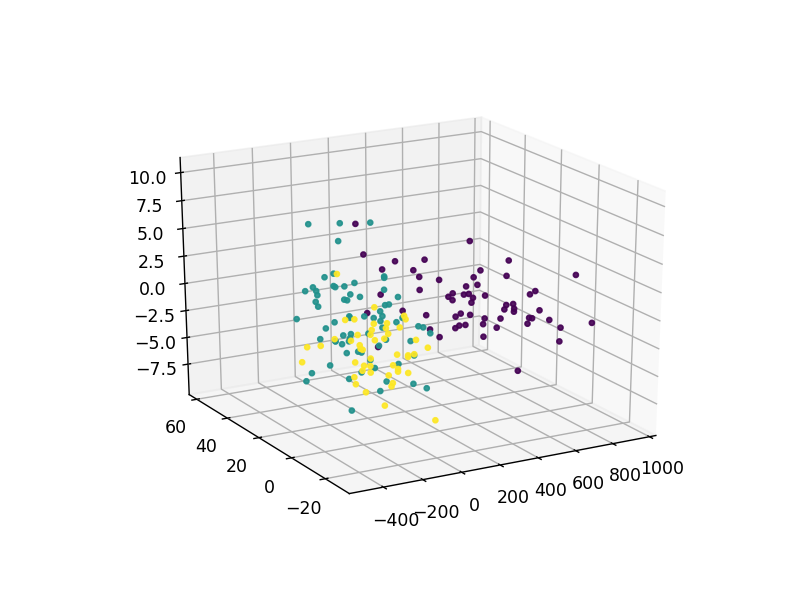

In [31]:
from sklearn.decomposition import PCA
%matplotlib notebook
transformer = PCA(n_components=3)
X_new = transformer.fit_transform(wine.data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c=wine.target, alpha=0.9, s=8)

# ML. No. 1- Naïve Bayes 

- Pure statistical approach
- Fast
- Based on the Bayes theorem of probability
- Used for *Classification* (to be explained later)

### Assumption
Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature <br>
In other words the naive conditional independence assumption considers each feature $x_i$ to be conditionally independent of every other feature $x_{j}$ for $j\neq i$, given the category y.

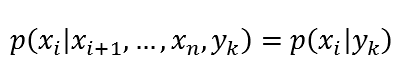

**Example** <br>
Features: alcohol, hue, color_intensity, magnesium <br> 
Label (target): cheap, fair_price, expensive <br>
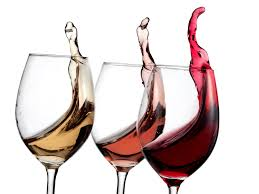

### Bayesian Theorem (simplified form)

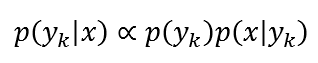

 **Posterior probability**: the conditional probability of a the observation belonging to a `class (hypothesis)`, **after** its `features (evidences)`  and `background knowledge (prior)` is taken into account <br><br>
 **Prior probability**: the probability of a `class (hypothesis)` **before** considering its `features (evidences)` <br><br>
 **Likelihood**: the compatibility of the `features (evidence)` with the given `class(hypothesis)` <br>

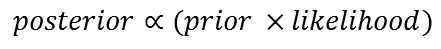

### Example

![Kaggle](figures/Slide22.PNG)

In [34]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(wine.data, wine.target)
y_pred = classifier.predict(wine.data)

print('number of correct predictions: {}/{}'.format((wine.target == y_pred).sum(),
                                                    wine.data.shape[0]))
print('accuracy: {:0.2f}'.format((wine.target == y_pred).sum()/ wine.data.shape[0]*100))

number of correct predictions: 176/178
accuracy: 98.88


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.5, random_state=5)

classifier = GaussianNB()
print(classifier.fit(X_train, y_train))
y_pred_train = classifier.predict(X_train)
print('Train #corrects: {}/{}'.format((y_train == y_pred_train).sum(), y_train.shape[0]))
print('accuracy on Train: {:0.2f}\n'.format((y_train == y_pred_train).sum()/ y_train.shape[0]*100))

y_pred = classifier.predict(X_test)
print('Test #corrects: {}/{}'.format((y_test == y_pred).sum(), y_test.shape[0]))
print('accuracy on test: {:0.2f}'.format((y_test == y_pred).sum()/ y_test.shape[0]*100))

GaussianNB(priors=None)
Train #corrects: 89/89
accuracy on Train: 100.00

Test #corrects: 84/89
accuracy on test: 94.38


<IPython.core.display.Javascript object>


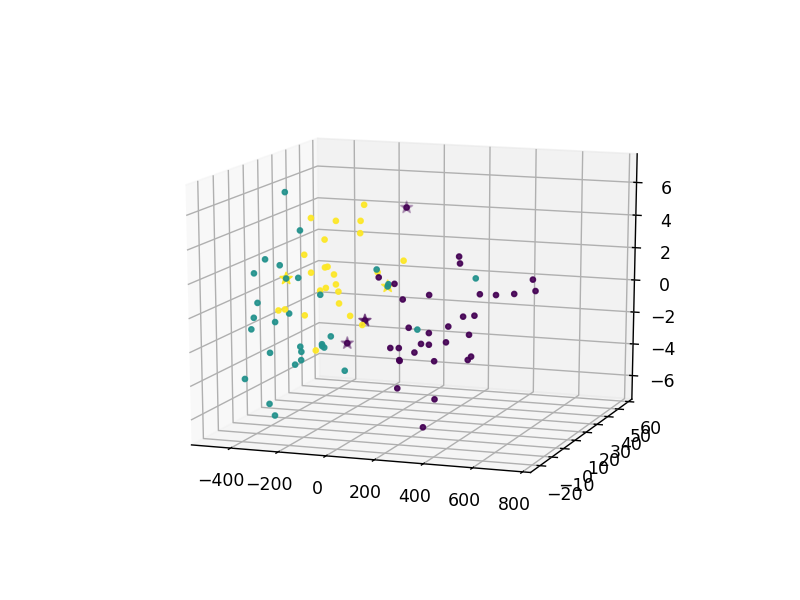

In [47]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=3)
X_test_new = transformer.fit_transform(X_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_new[:,0], 
           X_test_new[:,1], 
           X_test_new[:,2], 
           c=y_test, alpha=0.9, s=8)
ax.scatter(X_test_new[y_test != y_pred, 0], 
           X_test_new[y_test != y_pred, 1], 
           X_test_new[y_test != y_pred, 2], 
           c=y_test[y_test != y_pred], s=50, marker='*')

## Exercise
1- Change the `random_state` in the `train_test_split` function call. Fit naive_bayes again. What do you see? <br>
2- Reduce the `test_size` in the `train_test_split` function call. Now change the random state again. What do you conclude?

In [48]:
# Write down your conclusions as homework and submit them before next session.

# Back to theory

![Approaches to ML](figures/Slide16.PNG)

# ML. No. 2- Decision Tree

![decision tree](https://cdn-images-1.medium.com/max/880/1*xzF10JmR3K0rnZ8jtIHI_g.png)

- easy to understand and interpret (can be visualized, a white-box model)
- works with little data
- fast
- Used for Classification and Regression
- **Overfits** to the training set (will be explained)

In [69]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(random_state=123)
print(classifier.fit(wine.data, wine.target))
y_pred = classifier.predict(wine.data)

print('number of correct predictions: {}/{}'.format((wine.target == y_pred).sum(), wine.data.shape[0]))
print('accuracy: {:0.2f}'.format((wine.target == y_pred).sum()/ wine.data.shape[0]*100))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
number of correct predictions: 178/178
accuracy: 100.00


In [87]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=5)
classifier = tree.DecisionTreeClassifier(random_state=123, criterion='gini')
print(classifier.fit(X_train, y_train))

y_pred_train = classifier.predict(X_train)
print('Train #corrects: {}/{}'.format((y_train == y_pred_train).sum(), y_train.shape[0]))
print('accuracy on Train: {:0.2f}\n'.format((y_train == y_pred_train).sum()/ y_train.shape[0]*100))

y_pred = classifier.predict(X_test)
print('Test #corrects: {}/{}'.format((y_test == y_pred).sum(), y_test.shape[0]))
print('accuracy on test: {:0.2f}'.format((y_test == y_pred).sum()/ y_test.shape[0]*100))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
Train #corrects: 89/89
accuracy on Train: 100.00

Test #corrects: 80/89
accuracy on test: 89.89


In [78]:
tree.export_graphviz(classifier, out_file='tree.dot')

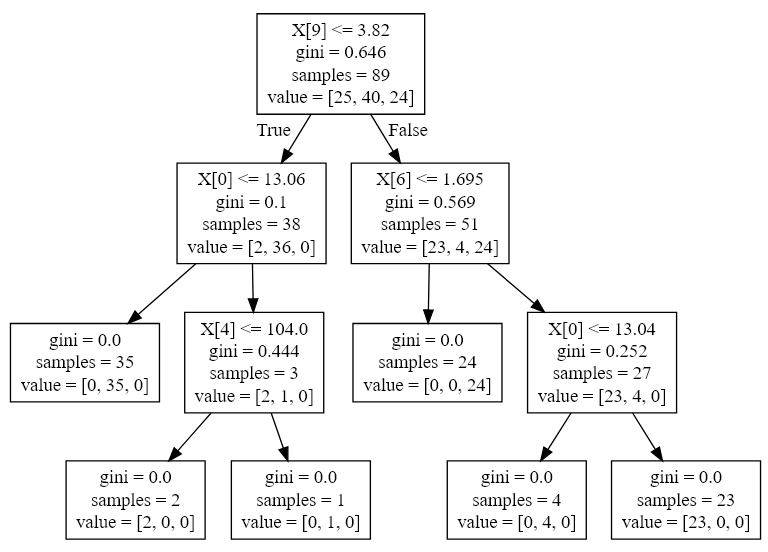

Information Gain criteria for data split in each node:
- Gini
- Entropy (to be discussed in the exercise)

#####  Less impurity (gini or entropy) --> More Information Gain

Impurity: How mixed (impure) the sample in this node are!<br> If all the samples of the node are from the same class,
`Gini = 0` and `entropy = 0`.

Gini:<br>
$IG_G = 1-\sum_i{{p_i}^2}$ <br>  <br>
$p_i = \frac{\text{number of items in class i}}{\text{total items}}$

Entropy:
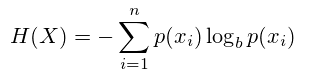

### Exercise
Change the criterion to `entropy` and see how it affects the results. <br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# Back to theory

### Overfitting, Bias, Variance
**Overfitting** 
- A modeling error which occurs when a function is too closely fit to a the training set.
- The model has memorized the training set instead of learning its patterns.
- A model that models the training data *too well*.

Bias vs Variance tradeoff:
- **Errors due to Bias**: The difference between the predictions of our model and the correct (target) value.
- **Variance**: Variability (sensitivity to noise) of a model prediction for a given data point.

A simple intuition: 
- **Bias** is how your model's **performance** in general (in train and test scenarios)
- **Variance** is the **difference** between training accuracy and test accuracy

Using strong assumptions generally means you can reduce the variance of your estimator (a good thing) at the cost of risking more model bias (a bad thing), and vice versa. 

![bias variance](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

# ML. No. 3- Random Forest

![random forest](https://cdn-images-1.medium.com/max/1600/1*xxahsU68wsbXyMYAFTf-Eg.png)

Random Forest: <br>
- An ensemble of of Decision Trees
- Reduces overfitting

### Exercise:
- Check the RandomForestClassifier in the scikit-learn library. 
- Complete the code in the next cell
- Which argument determines the number of trees? <br>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1234, n_estimators=50)

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=5)
print(classifier.fit(X_train, y_train))

y_pred_train = classifier.predict(X_train)
print('Train #corrects: {}/{}'.format((y_train == y_pred_train).sum(), y_train.shape[0]))
print('accuracy on Train: {:0.2f}\n'.format((y_train == y_pred_train).sum()/ y_train.shape[0]*100))

y_pred = classifier.predict(X_test)
print('Test #corrects: {}/{}'.format((y_test == y_pred).sum(), y_test.shape[0]))
print('accuracy on test: {:0.2f}'.format((y_test == y_pred).sum()/ y_test.shape[0]*100))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)
Train #corrects: 89/89
accuracy on Train: 100.00

Test #corrects: 84/89
accuracy on test: 94.38


# ML. No. 4- Logistic Regression as a Classifier

Logistic Function: <br>
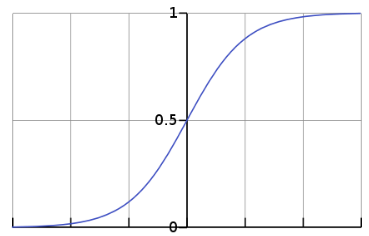

## $ 0 \leq h_\theta(x) \leq 1 $ <br>

## $ h_\theta(x) = \frac{1}{1+e^{-\theta X}} $

## $ h_\theta(x) = p(y|x;\theta) $

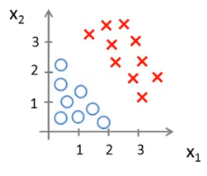

# $ h_\theta(x) =  \frac{1}{1+e^{-  (\theta_{0} ~+~ \theta_{1} x_1~ +~ \theta_{2} x_2 )   }} $

In the above example (binary classifier), Logistic Regression minimizes the following cost function: <br>

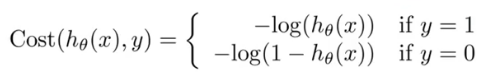

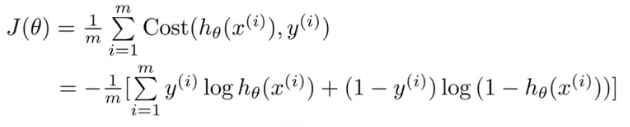

### iris dataset
https://archive.ics.uci.edu/ml/datasets/iris
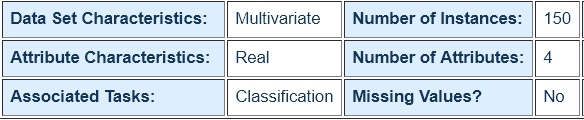

In [99]:
iris = datasets.load_iris()
iris.data = iris.data[:,:2]

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.5, random_state=5)
print(classifier.fit(X_train, y_train))

y_pred_train = classifier.predict(X_train)
print('Train #corrects: {}/{}'.format((y_train == y_pred_train).sum(), y_train.shape[0]))
print('accuracy on Train: {:0.2f}\n'.format((y_train == y_pred_train).sum()/ y_train.shape[0]*100))

y_pred = classifier.predict(X_test)
print('Test #corrects: {}/{}'.format((y_test == y_pred).sum(), y_test.shape[0]))
print('accuracy on test: {:0.2f}'.format((y_test == y_pred).sum()/ y_test.shape[0]*100))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train #corrects: 53/75
accuracy on Train: 70.67

Test #corrects: 45/75
accuracy on test: 60.00


In [100]:
def my_plot(data, target, classifier):
    %matplotlib inline       
    h = .02  # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each    
    h_min, h_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    v_min, v_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    hh, vv = np.meshgrid(np.arange(h_min, h_max, h), np.arange(v_min, v_max, h))
    Z = classifier.predict(np.concatenate([np.expand_dims(hh.ravel(), axis=1), 
                                           np.expand_dims(vv.ravel(), axis=1)], axis=1))
    # Put the result into a color plot
    Z = Z.reshape(hh.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(hh, vv, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(hh.min(), hh.max())
    plt.ylim(vv.min(), vv.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

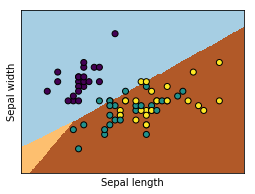

In [102]:
my_plot(X_test, y_test, classifier)

#### Take-home Exercise 
1- Play with logistic regression classifier, and increase its accuracy <br>
2- Classify the `iris` dataset (only considering the first two features and ignoring the 3rd and 4th feature) using the following classifiers and visualize the test results:
- Naive Bayes
- Decision Tree
- Random Forest

## Machine Learning vs Statistics

**Machine learning:** To learn from **Data** <br>
**Statistics:** a branch of mathematics dealing with the collection, analysis, interpretation, presentation, and organization of **Data** [Wikipedia] <br/>

Different points of view: <br>
- Machine learning is   applied &nbsp;&nbsp; &nbsp; statistics
- Machine learning is glorified &nbsp; &nbsp; statistics
- Machine learning is scaled up &nbsp; statistics (big data)

My preferred answer: <br>
- Machine learning makes *predictions* <br>
- Statistics makes *inferences*

# scikit-learn cheat sheet

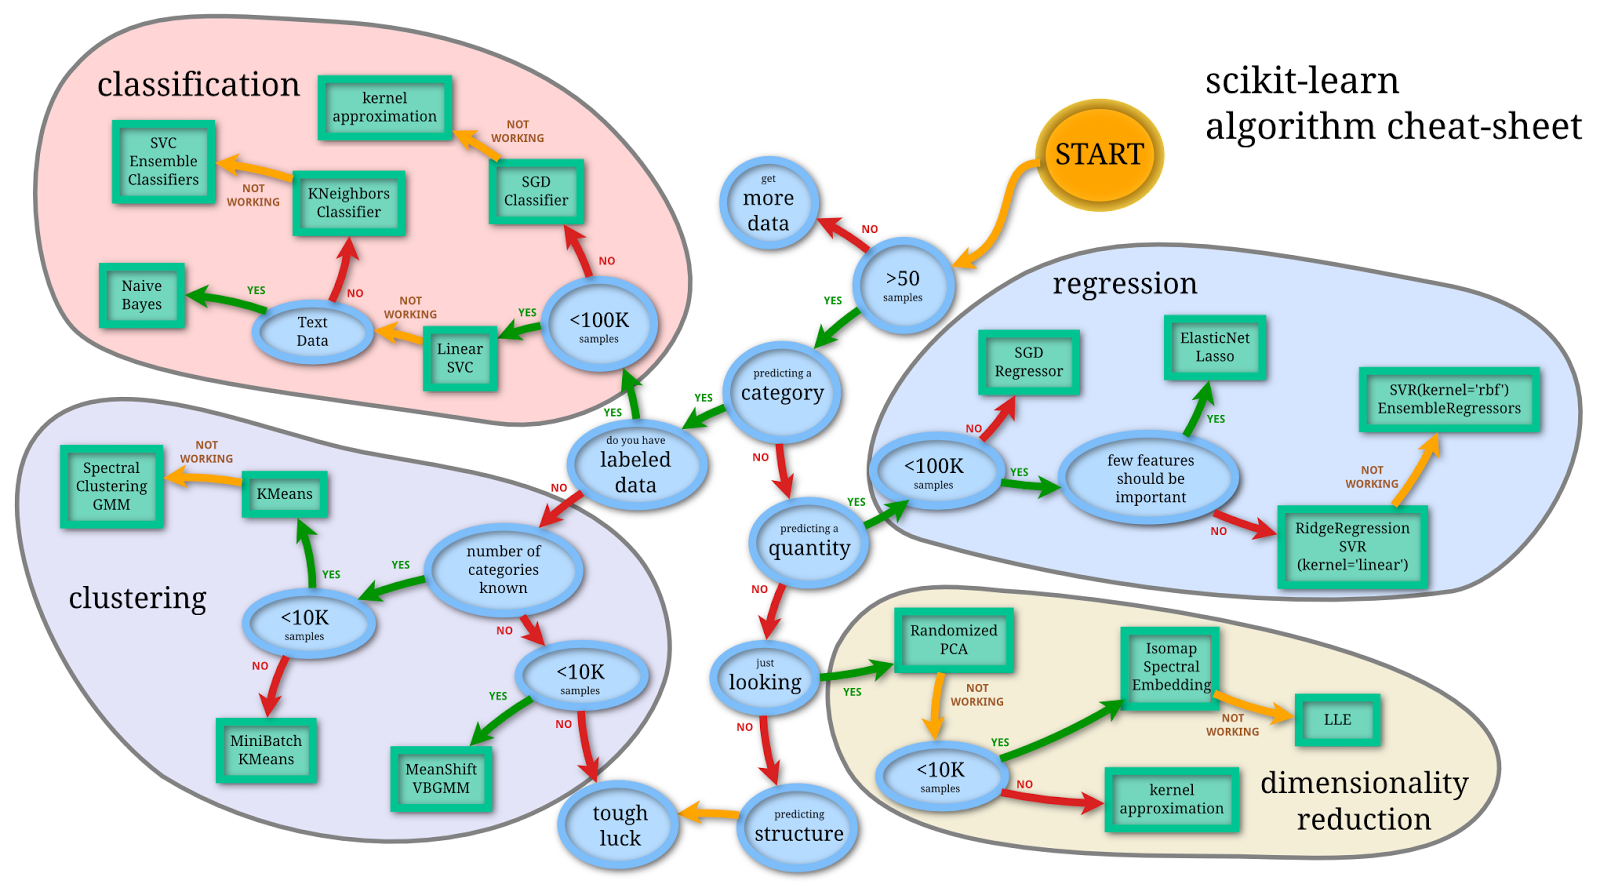

# Student Feedback
Please take a couple of minutes and give us your feedback to reflect on for the next session.
https://docs.google.com/forms/d/e/1FAIpQLSfESDwWv4r2aN0EREwWLtawED8URWgn1L6EPfM79mM0Ih3YNA/viewform?usp=sf_link

# a review on Pandas

In [19]:
import pandas as pd
my_data = np.ones((10,3))
for i in range(10):
    my_data[i,:] = i * 123
my_df = pd.DataFrame(my_data, columns=['color', 'smell', 'something'])
display(my_df)

,color,smell,something
0,0.0,0.0,0.0
1,123.0,123.0,123.0
2,246.0,246.0,246.0
3,369.0,369.0,369.0
4,492.0,492.0,492.0
5,615.0,615.0,615.0
6,738.0,738.0,738.0
7,861.0,861.0,861.0
8,984.0,984.0,984.0
9,1107.0,1107.0,1107.0


In [21]:
csv_data_frame = pd.read_csv('a csv file of your choice')
display(csv_data_frame)

,Voting Place ID,Voting Place,Times Cast,Undervotes,Overvotes,"ALEXANDER, Joy (Vision Vancouver)","ARNOLD, Christine","BALLANTYNE, Fraser (NPA)","BERCIC, Carrie (OneCity)","CLEMENT, Ken (Vision Vancouver)",...,"JAAF, Erica (OneCity)","LAMB, Theodora (Vision Vancouver)","LOMBARDI, Mike (Vision Vancouver)","MCDOWELL, Robert (NPA)","PICK, Adi","PRIETO, Julian (NPA)","RICHARDSON, Christopher JK (NPA)","WONG, Allan (Vision Vancouver)","ZAICHKOWSKY, Judy (Green Party)",Total Votes
0,200.0,Vancouver City Hall - Advance Voting Days,4174,10555,0,1647,651,1470,1373,1517,...,1320,1437,1443,1426,767,1344,1410,1584,1970,27011
1,1.0,Vancouver City Hall,1587,4022,2,684,289,434,641,606,...,615,602,560,409,354,395,398,586,768,10243
2,2.0,King George Secondary School,2334,5771,5,848,451,719,850,766,...,804,722,726,713,441,647,670,733,1347,15190
3,3.0,Lord Roberts Annex Elementary School,1794,4565,1,720,351,465,703,638,...,688,626,614,435,388,403,417,635,975,11572
4,4.0,Gathering Place Community Centre,706,1923,0,267,128,222,229,231,...,230,223,230,233,151,209,207,247,343,4431
5,5.0,Elsie Roy Elementary School,884,2036,0,275,171,485,243,244,...,254,247,236,488,169,454,467,249,367,5920
6,6.0,Crosstown Elementary School,775,1939,0,342,149,187,304,331,...,269,329,290,196,181,187,181,310,386,5036
7,7.0,Lord Strathcona Elementary School,988,2913,0,417,166,146,378,377,...,363,372,348,121,179,131,116,413,531,5979
8,8.0,Ray-Cam Co-operative Community Centre,415,1219,1,184,63,68,155,177,...,144,148,163,52,73,56,52,165,212,2507
9,9.0,Grandview Elementary School,1917,4651,1,962,283,240,906,912,...,863,903,815,229,427,213,190,889,1003,12593
